In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense,Flatten, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.model_selection import train_test_split
import tqdm
import cv2
from PIL import Image
import io
import ipywidgets as widgets
from sklearn.utils import shuffle
import tensorflow as tf

In [11]:
training_location = "/kaggle/input/brain-tumor-classification-mri/Training"
test_location = "/kaggle/input/brain-tumor-classification-mri/Testing"
count = 0
X = []
Y = []
for root, dirs, files in os.walk(training_location):
    if(len(files)!=0):
        for file in files:
            file_loc = os.path.join(root,file)
            img =  cv2.imread(file_loc)
            resized_img = cv2.resize(img,(150,150))
            X.append(resized_img)
            Y.append(count)
        count = count+1

count = 0
for root, dirs, files in os.walk(training_location):
    if(len(files)!=0):
        for file in files:
            file_loc = os.path.join(root,file)
            img =  cv2.imread(file_loc)
            resized_img = cv2.resize(img,(150,150))
            X.append(resized_img)
            Y.append(count)
        count = count+1
        
X = np.array(X)
Y = np.array(Y)            

In [13]:
X.shape

(5740, 150, 150, 3)

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,shuffle=True)
xtrain.shape

(4592, 150, 150, 3)

In [22]:
y_train_onehot= np.eye(4)[ytrain]
y_test_onehot= np.eye(4)[ytest]

y_train_onehot.shape

(4592, 4)

## model

In [20]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(64,(3,3),activation='relu'),
    Conv2D(64,(3,3),activation='relu'),
    Dropout(0.3),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(128,(3,3),activation='relu'),
    Conv2D(128,(3,3),activation='relu'),
    Dropout(0.3),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(4,activation='softmax'),
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    14,746,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,062,852 (57.46 MB)

 Trainable params: 15,062,852 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
history = model.fit(xtrain,y_train_onehot,epochs=20,validation_split=0.1)

Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 350s 3s/step - accuracy: 0.4275 - loss: 46.9509 - val_accuracy: 0.5913 - val_loss: 1.0486
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - accuracy: 0.6472 - loss: 0.8768 - val_accuracy: 0.6870 - val_loss: 0.7724
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.6940 - loss: 0.7308 - val_accuracy: 0.7457 - val_loss: 0.7606
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 347s 3s/step - accuracy: 0.8004 - loss: 0.4933 - val_accuracy: 0.8196 - val_loss: 0.5295
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.8513 - loss: 0.3806 - val_accuracy: 0.8413 - val_loss: 0.4628
Epoch 7/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.8788 - loss: 0.3175 - val_accuracy: 0.8891 - val_loss: 0.3665
Epoch 8/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.8940 - loss: 0.2708 - val_accuracy: 0.9304 - val_loss: 0.2799
Epoch 9/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 347s 3s/step - accuracy: 0.9179 - loss: 0.2198 - val_acc

## on test data

In [43]:
y_test_pred = model.predict(xtest)

36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 682ms/step


In [46]:
y_test_pred_new = np.argmax(y_test_pred,axis=1)
y_test_pred_new.shape

(1148,)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_test_pred_new))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       141
           1       0.99      0.99      0.99       332
           2       0.98      0.97      0.97       349
           3       0.99      0.98      0.98       326

    accuracy                           0.98      1148
   macro avg       0.98      0.98      0.98      1148
weighted avg       0.98      0.98      0.98      1148



# testing

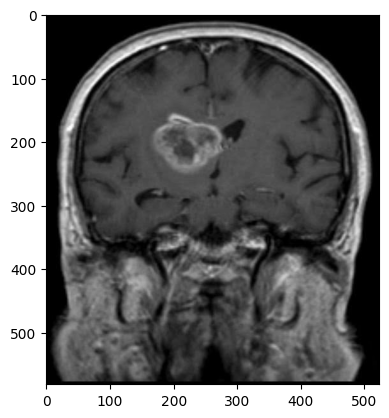

In [54]:
fileloc = "/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(12).jpg"
img = cv2.imread(fileloc)
plt.imshow(img)

In [56]:
mapping = {0:'glioma_tumor',1:'meningioma_tumor', 2:'no_tumor',3:'pituitary_tumor'}
img =  cv2.imread(fileloc)
resized_img = cv2.resize(img,(150,150))
resized_img = resized_img.reshape(1,150,150,3)

y = model.predict(resized_img)
print(y.round(2))
print(mapping[np.argmax(y)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.95 0.   0.05 0.  ]]
glioma_tumor
